In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('/content/data/raw/dirty_cafe_sales.csv')

In [3]:
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe())

Shape: (10000, 8)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


None

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [5]:
missing_count = df.isnull().sum()
missing_percent = 100 * missing_count / len(df)
missing_overview = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

os.makedirs('../results/tables', exist_ok=True)
missing_overview.to_csv('../results/tables/missing_overview_classification.csv')
display(missing_overview.head(10))

,missing_count,missing_percent
Location,3265,32.65
Payment Method,2579,25.79
Item,333,3.33
Price Per Unit,179,1.79
Total Spent,173,1.73
Transaction Date,159,1.59
Quantity,138,1.38
Transaction ID,0,0.00


In [6]:
dups = df.duplicated().sum()
print("Number of duplicate rows:", dups)
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows.to_csv('../results/tables/duplicate_rows_classification.csv', index=False)

Number of duplicate rows: 0


In [7]:
os.makedirs('../results/figures', exist_ok=True)

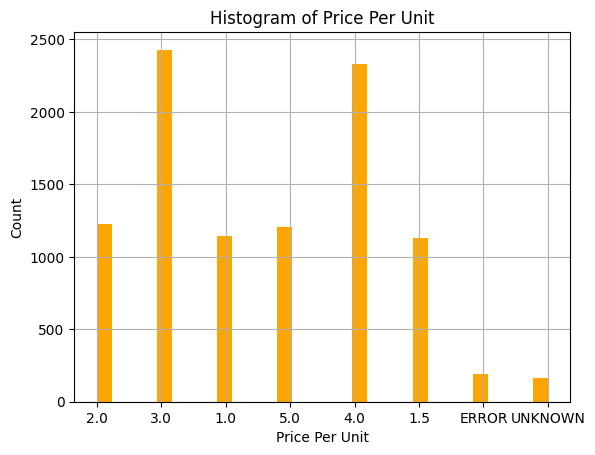

In [8]:
plt.figure()
df['Price Per Unit'].hist(bins=30, color='orange')
plt.title('Histogram of Price Per Unit')
plt.xlabel('Price Per Unit')
plt.ylabel('Count')
plt.savefig('../results/figures/hist_price_unit.png')
plt.show()

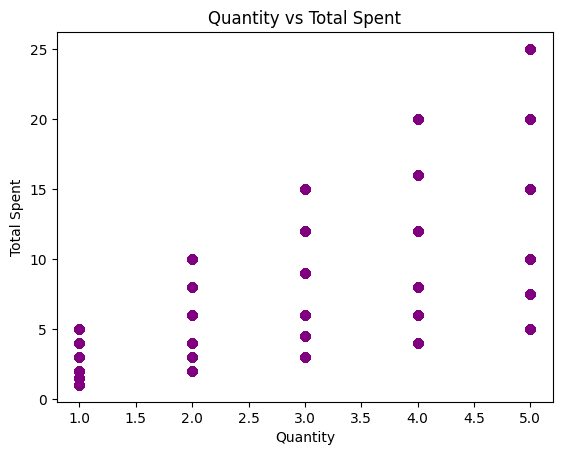

In [10]:
plt.figure()
df_numeric = df.copy()
df_numeric['Quantity'] = pd.to_numeric(df_numeric['Quantity'], errors='coerce')
df_numeric['Total Spent'] = pd.to_numeric(df_numeric['Total Spent'], errors='coerce')

df_numeric.dropna(subset=['Quantity', 'Total Spent'], inplace=True)

plt.scatter(df_numeric['Quantity'], df_numeric['Total Spent'], alpha=0.6, color='purple')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.title('Quantity vs Total Spent')
plt.savefig('../results/figures/scatter_qty_total_cafe.png')
plt.show()

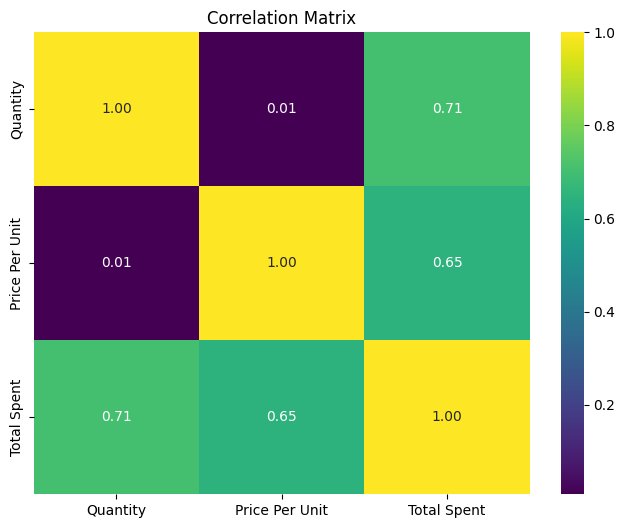

In [12]:
plt.figure(figsize=(8,6))

df_for_corr = df.copy()

df_for_corr['Quantity'] = pd.to_numeric(df_for_corr['Quantity'], errors='coerce')
df_for_corr['Price Per Unit'] = pd.to_numeric(df_for_corr['Price Per Unit'], errors='coerce')
df_for_corr['Total Spent'] = pd.to_numeric(df_for_corr['Total Spent'], errors='coerce')

num_cols = df_for_corr.select_dtypes(include=[np.number])

num_cols = num_cols.dropna()

if not num_cols.empty and num_cols.shape[1] > 1:
    sns.heatmap(num_cols.corr(), annot=True, fmt=".2f", cmap='viridis')
    plt.title('Correlation Matrix')
    plt.savefig('../results/figures/corr_matrix_cafe.png')
    plt.show()
else:
    print("Warning: No sufficient numeric columns or data after cleaning to compute a correlation matrix.")
    plt.title('Correlation Matrix (No Data)')
    plt.text(0.5, 0.5, 'No sufficient numeric columns or data for correlation plot',
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.savefig('../results/figures/corr_matrix_cafe.png')
    plt.show()